## Content 

 <b>1 | Preprocessing Steps</b>
 
    1.1 Import Libraries
    1.2 Configure Settings
    1.3 Import Files

 <b>2 | Structure Investigation</b>
 
    2.1 Initial Steps
    2.2 Null Value Check
    2.3 Structure of features
    2.4 Value Behaviour
    
 <b>3 | Univariate Analysis</b>
 
    3.1 Individual Column Shape
    3.2 Individual Column Value Observation (Min, Max and Outlier)

 <b>4 | Multivariate Analysis</b>
 
    4.1 Creating Relation Matrix and Graph
    4.2 Relation With Outcome
    4.3 Other Interesting Relationships (Leaving Outcome)
    
 <b>5 | Preprocessing</b>  
 
 <b>6 | Model</b>  
 
 <b>7 | Predictions</b>  
 

## 1 | Preprocessing Steps

### 1.1 | Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import math
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

### 1.2 | Configure Settings

In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',100)          # Set now of columns visible to 100
pd.set_option('display.max_rows',100)          # Set now of rows visible to 100

### 1.3 | Import Files

In [3]:
df_raw=pd.read_csv("/Users/abhi011097/Workspace/Dataset_Analysis/8_Pima_Indians_Diabetes/Dataset/diabetes.csv")
df=df_raw.copy()

## 2 | Structure Investigation

### 2.1 | Initial Steps

In [4]:
df.shape

(768, 9)

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [7]:
pd.value_counts(df.dtypes)

int64      7
float64    2
dtype: int64

### 2.2 | Null Value Check

* No null Value observed

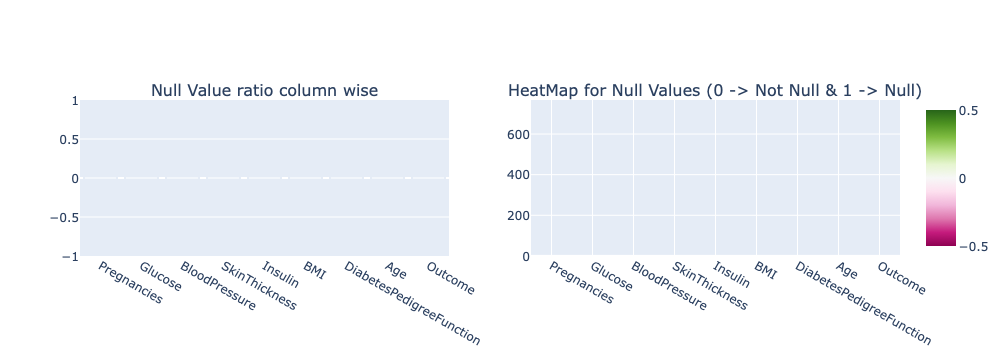

In [8]:
plt.subplots(1,2,figsize=(13,3))
plt.subplot(1,2,1)
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray") # we can test any condition in df using this graph
plt.xlabel("Column Number")
plt.ylabel("Sample Number")
plt.title("DATASET VIEW - Black (Not Null) & While (Null)")
plt.subplot(1,2,2)
df.isna().mean().sort_values().plot( kind="bar", title="Null Value Ratio per Feature", ylabel="Ratio of missing values per feature")
plt.show()

### 2.3 | Structure of features

In [9]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

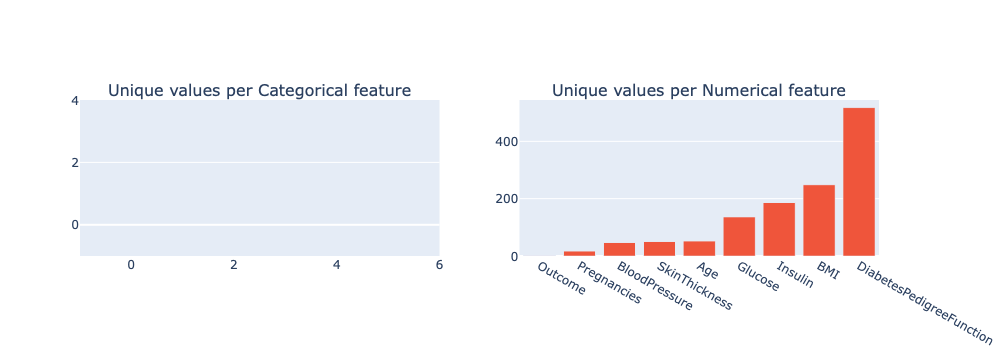

In [10]:
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Unique values per Categorical feature", "Unique values per Numerical feature"))


temp_data=df.select_dtypes(exclude="number").nunique().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values),
    row=1, col=1
)

temp_data=df.select_dtypes(include="number").nunique().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values),
    row=1, col=2
)

#fig.update_layout(showlegend=False)
fig.show()

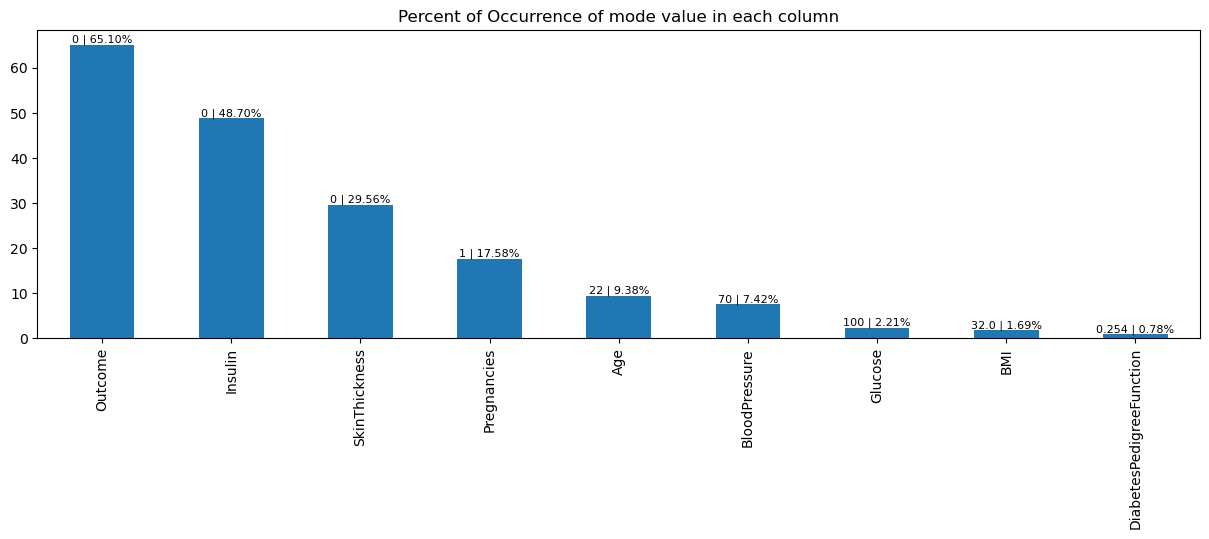

In [11]:
mod_percent_value={i:(df[i].value_counts().max()/df[i].size)*100 for i in df.columns}

#plot graph
pd.Series(mod_percent_value).sort_values(ascending=False).plot.bar(figsize=(15, 4))

# annotate text on top of each bar
for i, val in enumerate(pd.Series(mod_percent_value).sort_values(ascending=False).index):
    plt.text(i, pd.Series(mod_percent_value)[val], (df[val].astype(str).mode()[0])+str(" | "+str('{0:.2f}'.format(pd.Series(mod_percent_value)[val]))+"%")
             , horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':100, 'size':8})
plt.title("Percent of Occurrence of mode value in each column")
plt.show()

***
### 2.4 | Value Behaviour

* Each point in this figure is a sample (i.e. a row) in our dataset and each subplot represents a different feature.
* The y-axis shows the feature value, while the x-axis is the sample index
***
Observation
* Outcome is categorial column stored as number
* there are cases of value=0 which is not expected in features insulin , SkinThickness , BMI , Glucose , BloodPressure
* all rows having SkinThickness =0  also has insulin =0
* we have changed them to nan
***

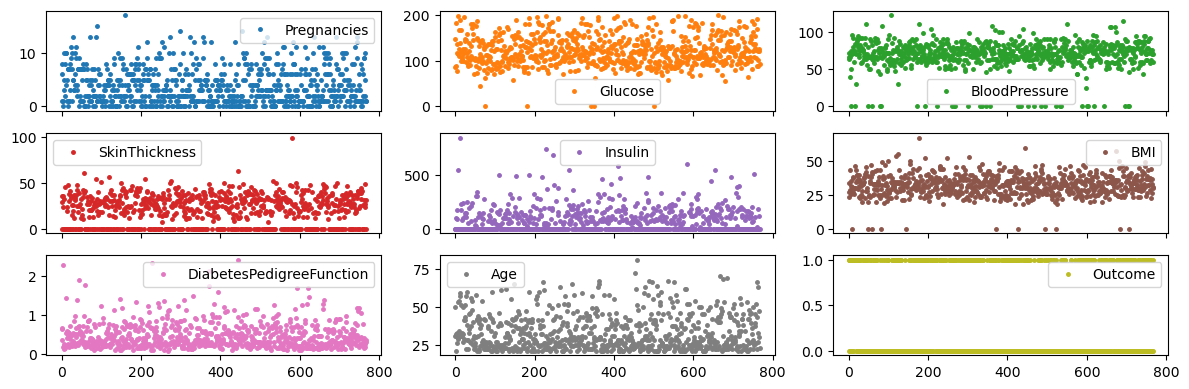

In [12]:
# For all Numerical columnn for all rows 
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(12,4), markersize=5)
plt.tight_layout()

In [13]:
df["Outcome"]=df["Outcome"].astype('str')
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

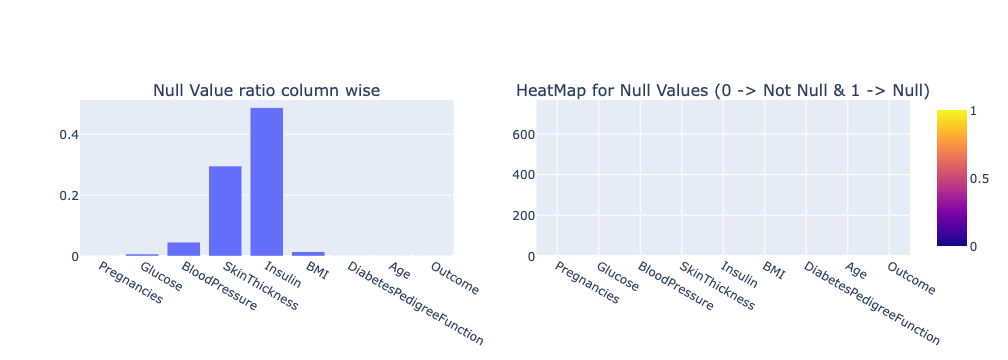

In [14]:
fig= make_subplots(rows=1,cols=2,
                  subplot_titles=("Null Value ratio column wise", "HeatMap for Null Values (0 -> Not Null & 1 -> Null)")
                  )



temp_data= df.isna().mean()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values),
    row=1, col=1
)

fig.add_trace(px.imshow(
                        df.isna().astype(np.int8)
                       ).data[0], 
              row=1,col=2)

fig.update_layout(showlegend=False)
fig.show()

## 3 | Univariate Content Analysis

***
### 3.1 | Individual Column Shape

* Fixed Column having nan with mean where there is negligible skewness
* Fixed Column having nan with median where there is high skewness
***

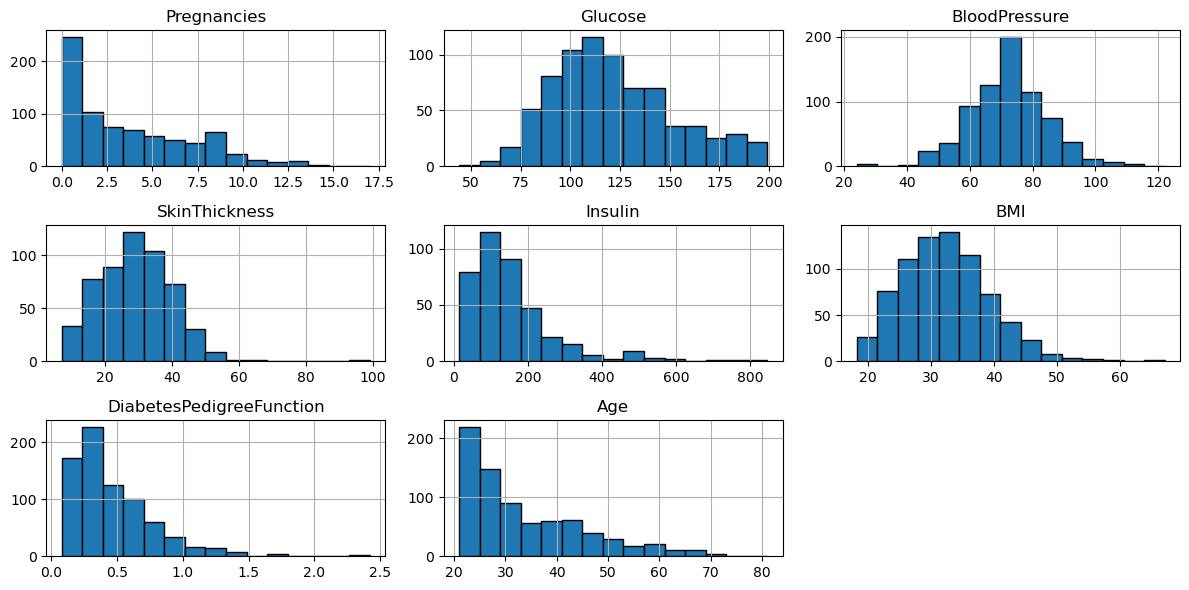

In [15]:
# Plots the histogram for each numerical feature in a separate subplot
figsize_val=(12,6)
layout_val=(-1, 3)
df.hist(bins=15, figsize=figsize_val, layout=layout_val, edgecolor="black")
plt.tight_layout();

In [16]:
df.skew().sort_values()

BloodPressure               0.134153
Glucose                     0.530989
BMI                         0.593970
Outcome                     0.635017
SkinThickness               0.690619
Pregnancies                 0.901674
Age                         1.129597
DiabetesPedigreeFunction    1.919911
Insulin                     2.166464
dtype: float64

In [17]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   763.0  121.686763   30.535641  44.000  99.00000   
BloodPressure             733.0   72.405184   12.382158  24.000  64.00000   
SkinThickness             541.0   29.153420   10.476982   7.000  22.00000   
Insulin                   394.0  155.548223  118.775855  14.000  76.25000   
BMI                       757.0   32.457464    6.924988  18.200  27.50000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  141.00000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              29.0000   36.00000   99.00  
Insulin                   125.0000  190.00000  846.00  
BMI                        32.3000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00

In [18]:
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Glucose'].fillna(df['Glucose'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)

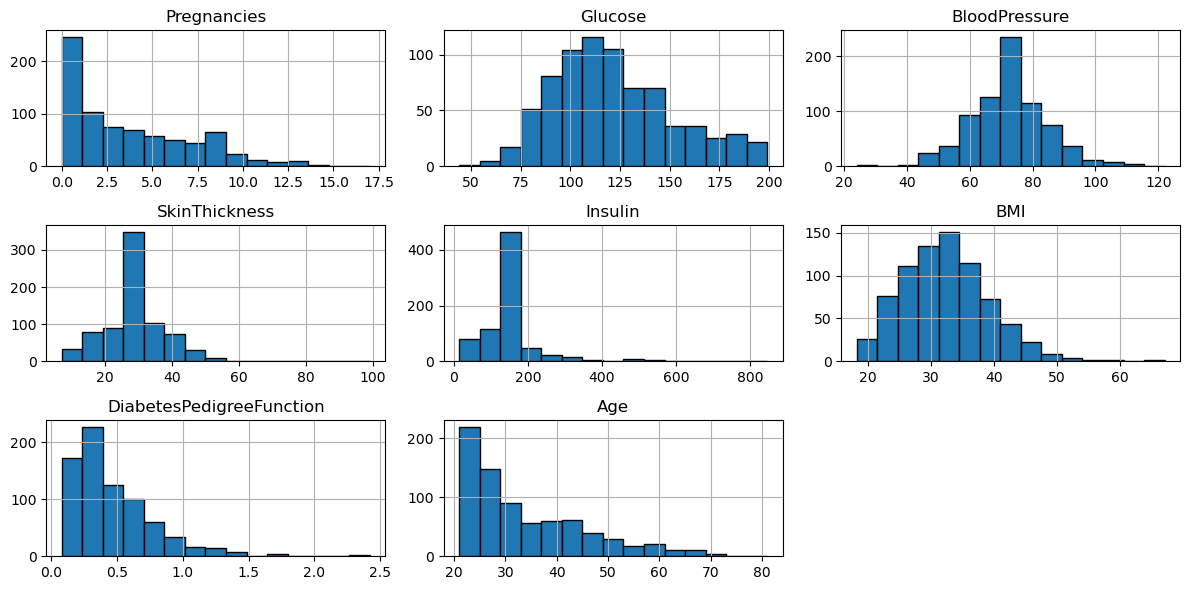

In [19]:
# Plots the histogram for each numerical feature in a separate subplot
figsize_val=(12,6)
layout_val=(-1, 3)
df.hist(bins=15, figsize=figsize_val, layout=layout_val, edgecolor="black")
plt.tight_layout();

### 3.2 | Individual Column Value Observation (Min, Max and Outlier)

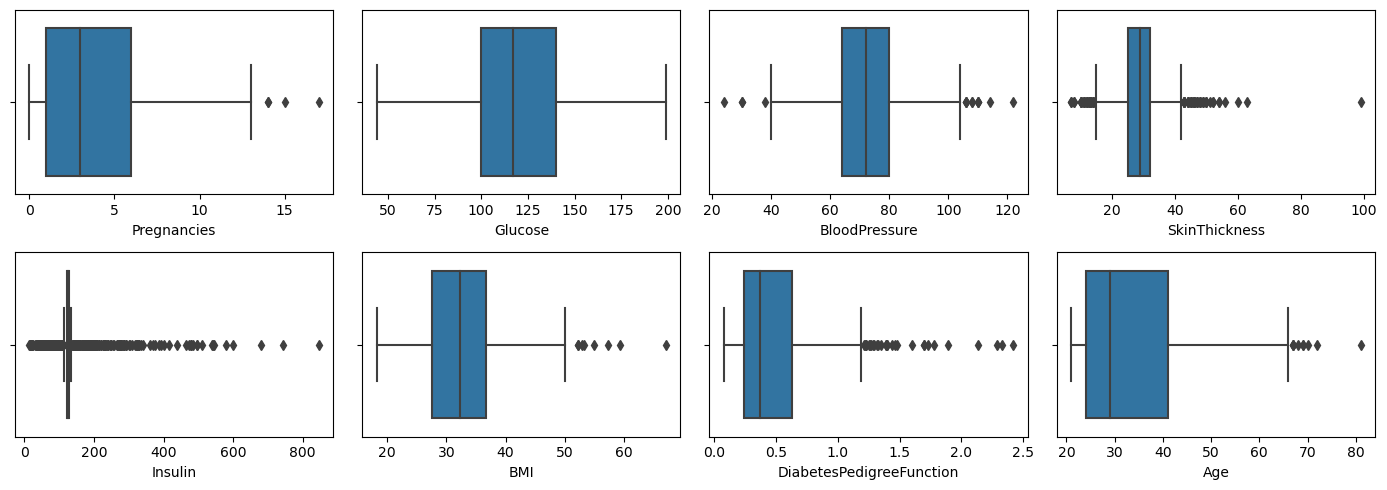

In [20]:
vars=df.columns.to_list()
y=4
x=math.ceil((len(vars)-1)/y)

plt.subplots(x,y,figsize=(14,5))

for i in range(1,len(vars)) :
    plt.subplot(x,y,i)
    sns.boxplot(data=df,x=vars[i-1])
    #plt.xlabel(vars[i-1])
    #plt.title(vars[i-1])
plt.tight_layout()    
plt.show()

In [21]:
upper =df.quantile(0.75)+1.5 *(df.quantile(0.75)-df.quantile(0.25))
lower = df.quantile(0.25)-1.5 *(df.quantile(0.75)-df.quantile(0.25))

columns_to_be_checked=vars[:-1]

for i in columns_to_be_checked:
    temp_min=df[df[i]== df[i].min()][['Outcome',i]]
    temp_max=df[df[i]== df[i].max()][['Outcome',i]]
    
    print('\nColumn -> ',i,'\nMin Value ->',temp_min[i].values[0],'| Outcome -> ',
          str(set(temp_min['Outcome'].to_list())).replace("'",'').replace('{','').replace('}',''))
    
    print('Max Value ->',temp_max[i].values[0],'| Outcome -> ',
          str(set(temp_max['Outcome'].to_list())).replace("'",'').replace('{','').replace('}',''))
    
    x= df[ (df[i]<round(lower[i],2)) |  (df[i]>round(upper[i],2))][i].to_list()
    print('No of Outliers presesnt -> ',len(x))
    print('\n','*'*10)


Column ->  Pregnancies 
Min Value -> 0 | Outcome ->  0, 1
Max Value -> 17 | Outcome ->  1
No of Outliers presesnt ->  4

 **********

Column ->  Glucose 
Min Value -> 44.0 | Outcome ->  0
Max Value -> 199.0 | Outcome ->  1
No of Outliers presesnt ->  0

 **********

Column ->  BloodPressure 
Min Value -> 24.0 | Outcome ->  0
Max Value -> 122.0 | Outcome ->  0
No of Outliers presesnt ->  14

 **********

Column ->  SkinThickness 
Min Value -> 7.0 | Outcome ->  0, 1
Max Value -> 99.0 | Outcome ->  1
No of Outliers presesnt ->  87

 **********

Column ->  Insulin 
Min Value -> 14.0 | Outcome ->  1
Max Value -> 846.0 | Outcome ->  1
No of Outliers presesnt ->  346

 **********

Column ->  BMI 
Min Value -> 18.2 | Outcome ->  0
Max Value -> 67.1 | Outcome ->  1
No of Outliers presesnt ->  8

 **********

Column ->  DiabetesPedigreeFunction 
Min Value -> 0.078 | Outcome ->  0
Max Value -> 2.42 | Outcome ->  1
No of Outliers presesnt ->  29

 **********

Column ->  Age 
Min Value -> 21 | Out

## 4 | Multivariate Investigation

### 4.1 | Creating Relation Matrix and Graph

In [22]:
temp_corr=df.corr()
temp_corr

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128213       0.208522       0.081770   
Glucose                      0.128213  1.000000       0.218749       0.192615   
BloodPressure                0.208522  0.218749       1.000000       0.191853   
SkinThickness                0.081770  0.192615       0.191853       1.000000   
Insulin                      0.025047  0.419451       0.045087       0.155610   
BMI                          0.021559  0.231049       0.281199       0.543205   
DiabetesPedigreeFunction    -0.033523  0.137327      -0.002763       0.102188   
Age                          0.544341  0.266909       0.324595       0.126107   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.025047  0.021559                 -0.033523   
Glucose                   0.419451  0.231049                  0.137327   
BloodPressure             0.045087  0.281199                 -0.002763   
SkinThickness             0.155610  0.543205                  0.102188   
Insulin                   1.000000  0.180241                  0.126503   
BMI                       0.180241  1.000000                  0.153438   
DiabetesPedigreeFunction  0.126503  0.153438                  1.000000   
Age                       0.097101  0.025597                  0.033561   

                               Age  
Pregnancies               0.544341  
Glucose                   0.266909  
BloodPressure             0.324595  
SkinThickness             0.126107  
Insulin                   0.097101  
BMI                       0.025597  
DiabetesPedigreeFunction  0.033561  
Age                       1.000000

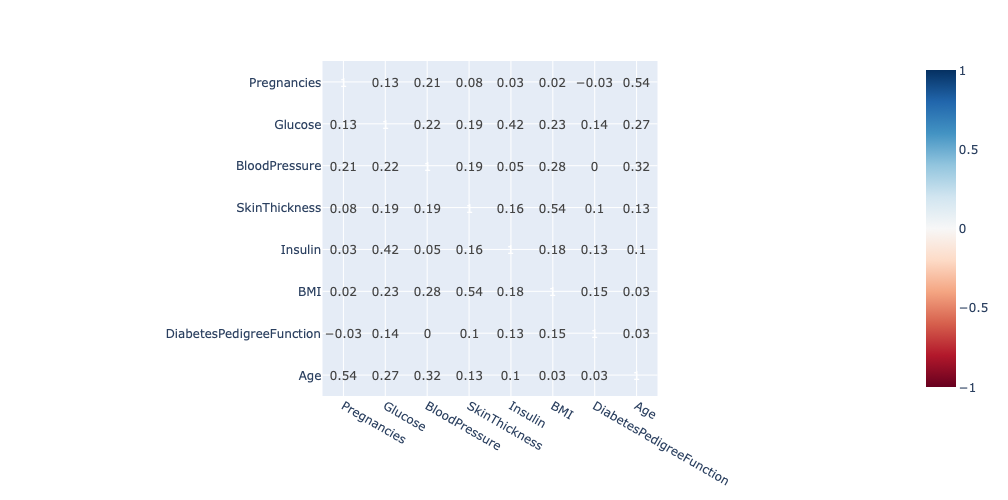

In [23]:
fig = px.imshow(df.corr().round(2),zmin=-1,zmax=1, text_auto=True,width=1000,height=500,aspect=None,color_continuous_scale='rdbu')
fig.show()

### 4.2 | Relation With Outcome

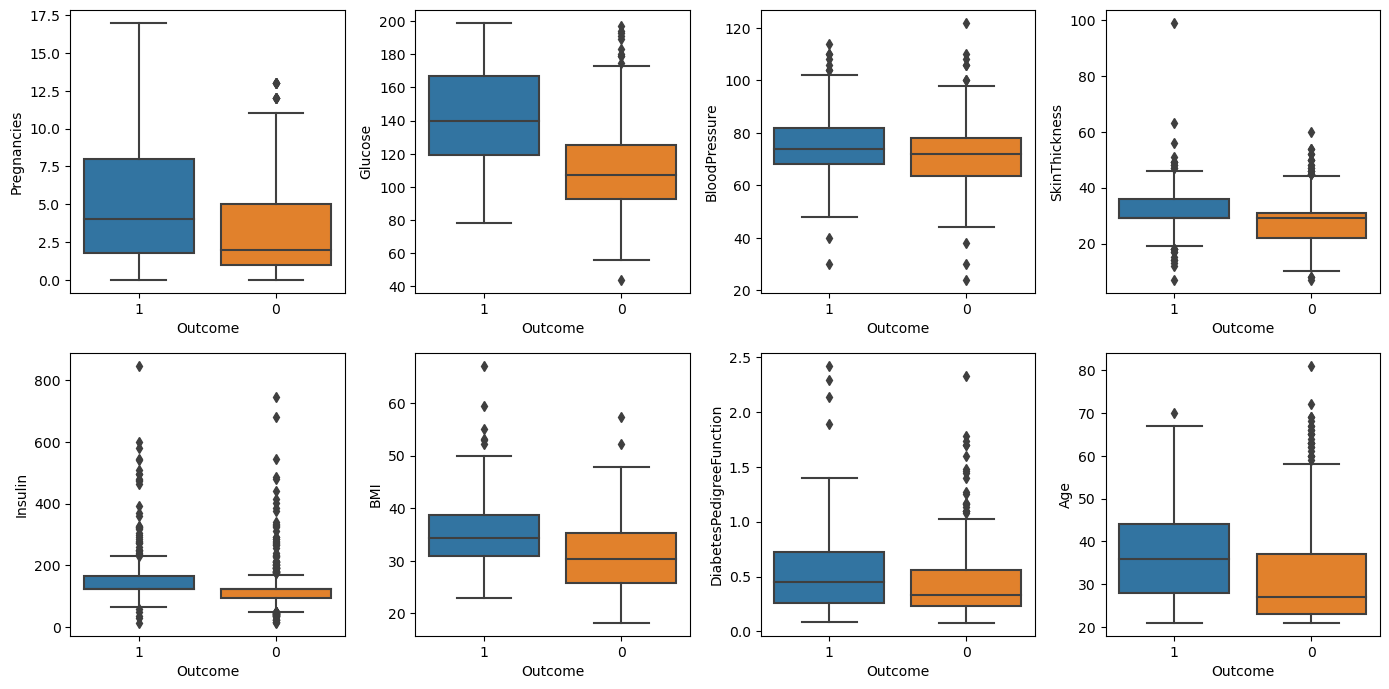

In [24]:
y=4
x=math.ceil((len(df.columns)-1)/y)

plt.subplots(x,y,figsize=(14,7))

for i in range(1,len(vars)) :
    plt.subplot(x,y,i)
    sns.boxplot(data=df,y=vars[i-1],x='Outcome')
    #plt.xlabel(vars[i-1])
    #plt.title(vars[i-1])
plt.tight_layout()    
plt.show()

### 4.3 | Other Interesting Relationships (Leaving Outcome)

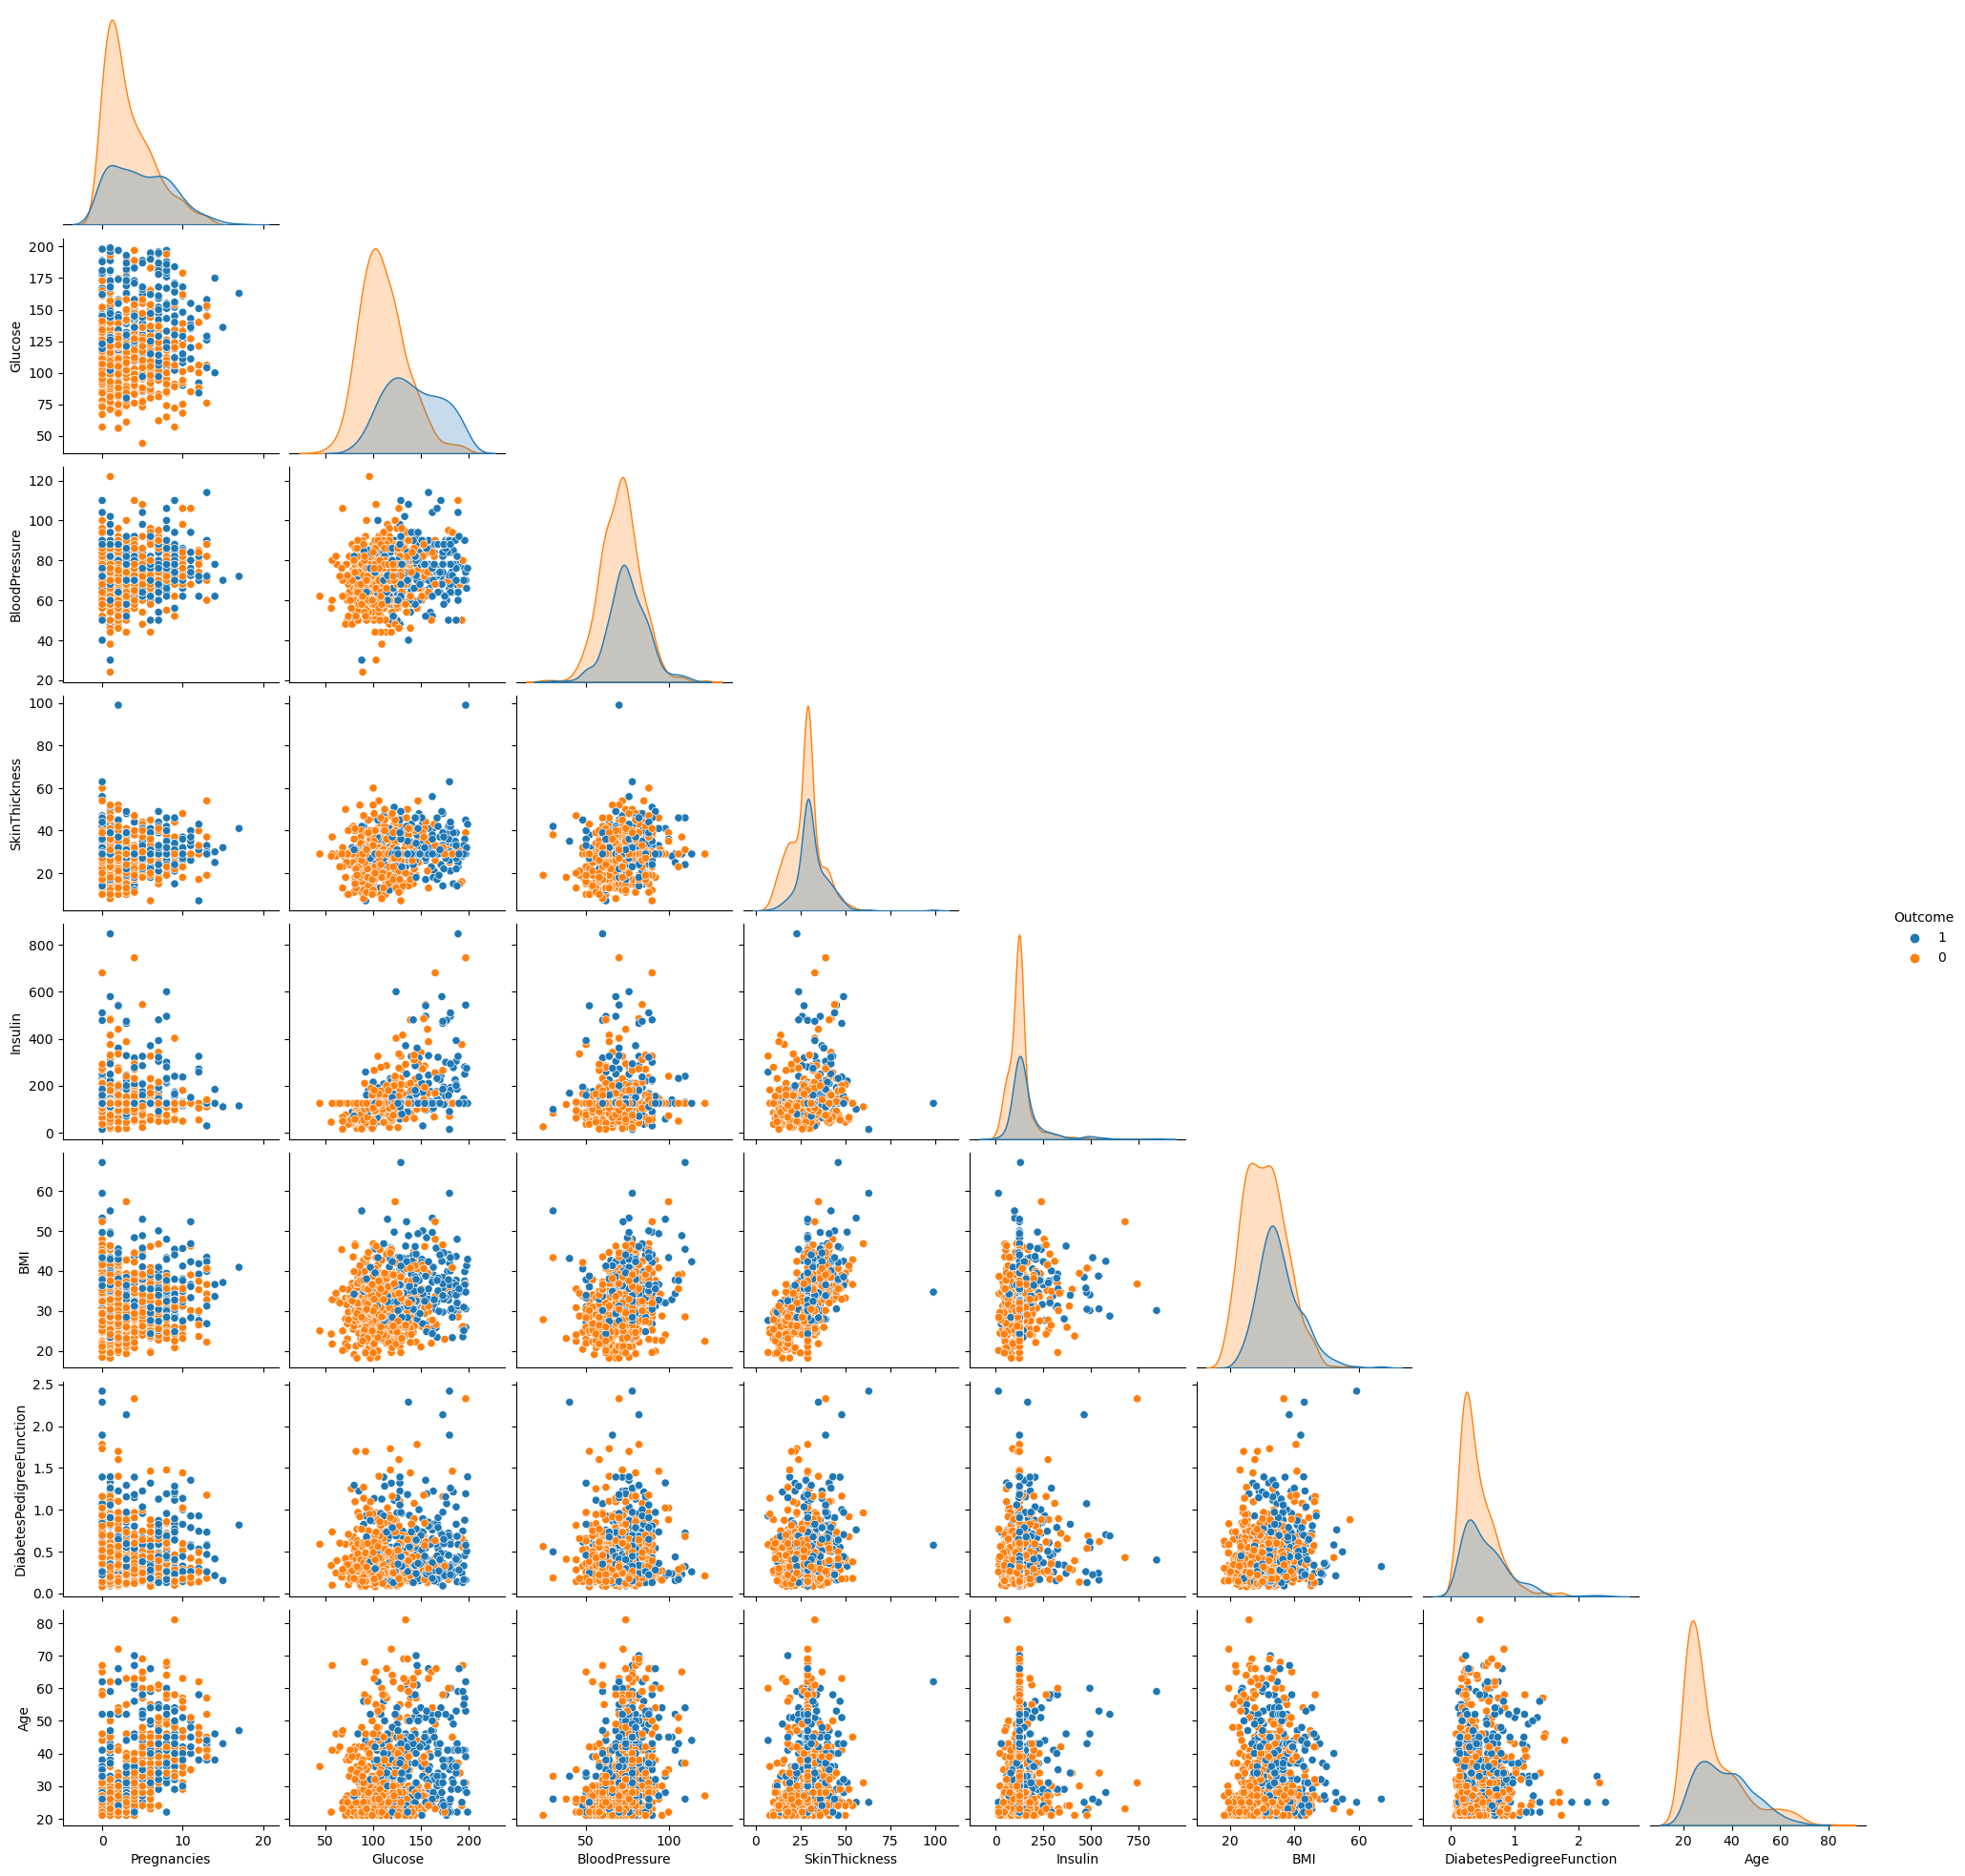

In [25]:
temp_li=df.select_dtypes(include='number').columns.to_list()

sns.pairplot(data=df,
                  hue='Outcome',
                 corner=True
)
                  
plt.show()

In [26]:
temp_corr=df.corr()
res = [(a, b) for idx, a in enumerate(temp_corr.index) for b in temp_corr.index[idx + 1:]]

strong=[]
moderate=[]
weak=[]
no_relationship=[]
for x,y in res:
    p=temp_corr[x][y]
    if p >= 0.75 or p <= -0.75:
        strong.append((x,y))
    elif p >= 0.50 or p <= -0.50:
        moderate.append((x,y))
    elif p >= 0.25 or p <= -0.25:
        weak.append((x,y))
    else :
        no_relationship.append((x,y))
    
print('\nStrong -> ',strong)
print('\nModerate -> ',moderate)
print('\nWeak -> ',weak)
print('\nNo_relationship -> ',no_relationship)


Strong ->  []

Moderate ->  [('Pregnancies', 'Age'), ('SkinThickness', 'BMI')]

Weak ->  [('Glucose', 'Insulin'), ('Glucose', 'Age'), ('BloodPressure', 'BMI'), ('BloodPressure', 'Age')]

No_relationship ->  [('Pregnancies', 'Glucose'), ('Pregnancies', 'BloodPressure'), ('Pregnancies', 'SkinThickness'), ('Pregnancies', 'Insulin'), ('Pregnancies', 'BMI'), ('Pregnancies', 'DiabetesPedigreeFunction'), ('Glucose', 'BloodPressure'), ('Glucose', 'SkinThickness'), ('Glucose', 'BMI'), ('Glucose', 'DiabetesPedigreeFunction'), ('BloodPressure', 'SkinThickness'), ('BloodPressure', 'Insulin'), ('BloodPressure', 'DiabetesPedigreeFunction'), ('SkinThickness', 'Insulin'), ('SkinThickness', 'DiabetesPedigreeFunction'), ('SkinThickness', 'Age'), ('Insulin', 'BMI'), ('Insulin', 'DiabetesPedigreeFunction'), ('Insulin', 'Age'), ('BMI', 'DiabetesPedigreeFunction'), ('BMI', 'Age'), ('DiabetesPedigreeFunction', 'Age')]


## 5 | Preprocessing

In [84]:
x = df.drop(labels = ['Outcome'], axis = 1)
y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=5)

In [85]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [86]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## 6 | Models

In [87]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [88]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.752341 (0.026098)
LDA: 0.752341 (0.026098)
KNN: 0.700454 (0.061771)
CART: 0.707617 (0.039858)
NB: 0.728232 (0.045662)
SVM: 0.741265 (0.035900)


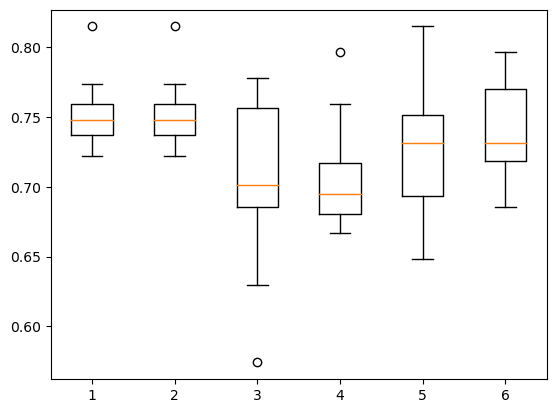

In [89]:
plt.boxplot(results) 
plt.show()

## 7 | Predictions
* Used LinearDiscriminantAnalysis which was having best mean of 0.755196

In [90]:
# Make predictions on test dataset
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [91]:
predictions = lda.predict(x_test)

In [92]:
print(accuracy_score(y_test, predictions))

0.7922077922077922
